In [6]:
import pandas as pd
import pandas as pd
import string, nltk
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:

# Load dataset
df = pd.read_csv(r"C:\Users\Admin\Downloads\fake reviews dataset (1).csv")  # Replace with your dataset file path

In [8]:
df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [9]:
# Inspect the data
print(df.head())

             category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                               text_  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...  


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB
None


In [12]:
print(df['label'].value_counts())  # Check the distribution of fake vs. real reviews

label
CG    20216
OR    20216
Name: count, dtype: int64


In [13]:
df['category'].unique()

array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'], dtype=object)

In [14]:
df['category'].nunique()

10

In [15]:
# Label column will be the target . It has two categories [OG & OR ] so binary classification will be performed.

In [16]:
#EDA
# calculate the class distribution of target column

label_count = df['label'].value_counts()
label_count

label
CG    20216
OR    20216
Name: count, dtype: int64

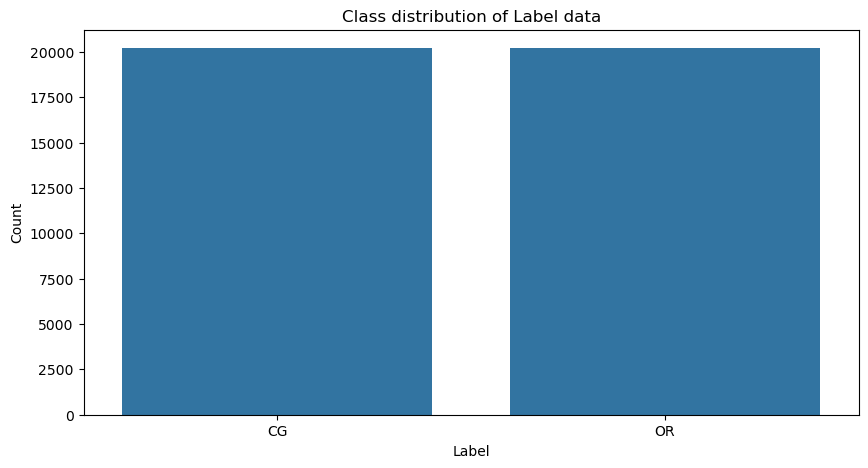

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting a barplot
sns.barplot(x=label_count.index, y=label_count.values, ax=ax)

# Adding title and labels
ax.set_title("Class distribution of Label data")
ax.set_xlabel("Label")
ax.set_ylabel("Count")

# Show the plot
plt.show()


In [18]:
#distribution of rating 
rating_count = df['rating'].value_counts()
rating_count

rating
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64

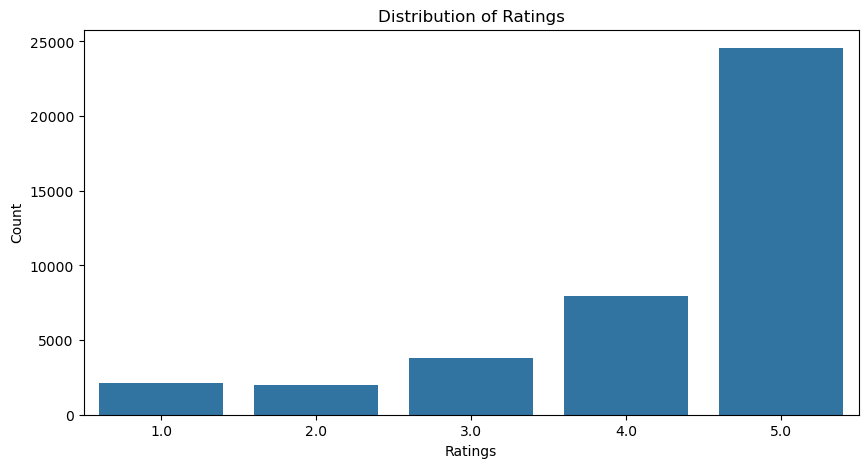

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting a barplot
sns.barplot(x=rating_count.index, y=rating_count.values, ax=ax)

# Setting the title and labels using ax methods
ax.set_title("Distribution of Ratings")
ax.set_xlabel("Ratings")
ax.set_ylabel("Count")

# Display the plot
plt.show()


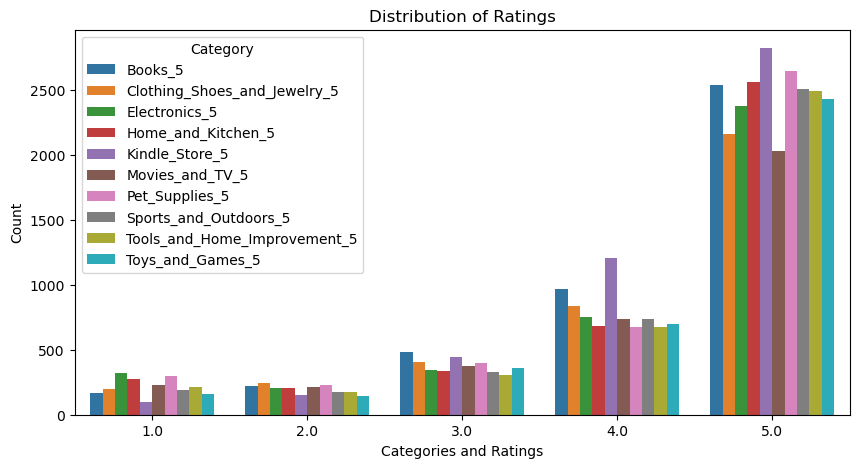

In [20]:
# Group by ratings and category
grouped_data = df.groupby(['rating', 'category']).size().reset_index(name='count')

plt.figure(figsize=(10, 5))
sns.barplot(data=grouped_data, x='rating', y='count', hue='category')
plt.title("Distribution of Ratings")
plt.xlabel("Categories and Ratings")
plt.ylabel("Count")
plt.legend(title="Category")
plt.show()

In [21]:
#EDA
#summary statistics of a DataFrame
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [22]:
df['rating'].value_counts()

rating
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64

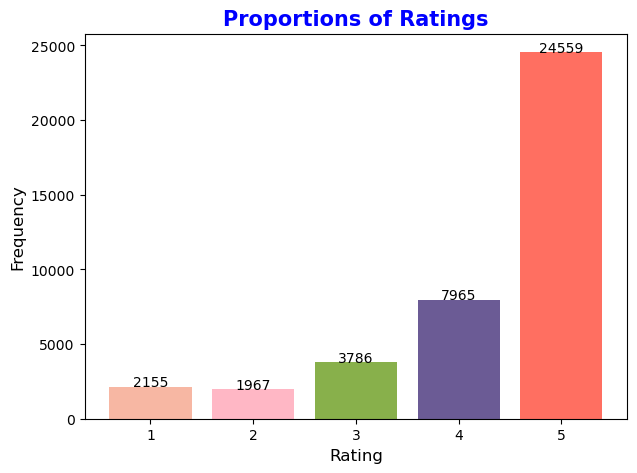

In [23]:
import matplotlib.pyplot as plt

# Create a figure with specific size
plt.figure(figsize=(7,5))

# Get the value counts for ratings
rating_counts = df['rating'].value_counts()

# Plotting the bar chart
plt.bar(rating_counts.index, rating_counts.values, color=['#ff6f61', '#6b5b95', '#88b04b', '#f7b7a3', '#ffb7c5'])

# Adding labels and title
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Proportions of Ratings', fontweight='bold', fontsize=15, color='Blue')

# Show the proportions on top of the bars
for i, value in enumerate(rating_counts.values):
    plt.text(rating_counts.index[i], value + 0.2, f'{value}', ha='center', fontsize=10, color='black')

# Display the plot
plt.show()


In [24]:
pip install nltk

In [25]:
#data preprocessing
#check for null values
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [27]:
print(nltk.data.path)

['C:\\Users\\Admin/nltk_data', 'C:\\Users\\Admin\\anaconda3\\nltk_data', 'C:\\Users\\Admin\\anaconda3\\share\\nltk_data', 'C:\\Users\\Admin\\anaconda3\\lib\\nltk_data', 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [28]:
#Datatype convertion
# object to string conversion 
df['text_'] = df['text_'].astype(str)

In [29]:
#clean and standardize text data
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
# Removing stopwords, punctuation, and digits, while lowering the text case
# function to preprocess the text data
# Load stopwords and punctuation once
stop_words = set(stopwords.words('english'))
punctuation_set = set(string.punctuation)

def preprocess(text):
    return ' '.join(
        word for word in word_tokenize(text.lower())  # Convert text to lowercase to standardize
        if word not in stop_words and not word.isdigit() and word not in punctuation_set
    )

In [31]:
# Apply preprocessing
df['cleaned_text'] = df['text_'].apply(preprocess)
                                                
print(df['cleaned_text'].head())

0        love well made sturdy comfortable love pretty
1    love great upgrade original 've mine couple years
2              pillow saved back love look feel pillow
3          missing information use great product price
4                 nice set good quality set two months
Name: cleaned_text, dtype: object


In [32]:
from tqdm import tqdm

# Apply the function with a progress bar
tqdm.pandas()
df['text_'] = df['text_'].progress_apply(preprocess)

100%|██████████| 40432/40432 [00:42<00:00, 941.85it/s] 


In [33]:
#Applying PorterStemmer to reduce words to their root form
# Stemmer 
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text_'] = df['text_'].apply(lambda x: stem_words(x))

In [34]:
df['text_'].head()

0       love well made sturdi comfort love pretti
1    love great upgrad origin 've mine coupl year
2          pillow save back love look feel pillow
3             miss inform use great product price
4             nice set good qualiti set two month
Name: text_, dtype: object

In [35]:
#Reducing words to their base or dictionary form using WordNetLemmatizer
#lemmetizer
lemmatizer = WordNetLemmatizer()
def lemm_words(text):
    return [lemmatizer.lemmatize(word) for word in text.split()]
df['text_'] = df['text_'].apply(lambda text : lemm_words(text))

In [36]:
df['text_'].head()

0    [love, well, made, sturdi, comfort, love, pretti]
1    [love, great, upgrad, origin, 've, mine, coupl...
2       [pillow, save, back, love, look, feel, pillow]
3           [miss, inform, use, great, product, price]
4          [nice, set, good, qualiti, set, two, month]
Name: text_, dtype: object

In [37]:
# Join the list of words in each row to form a single sentence, the form that is typically required for training machine learning models.
df['cleaned_text'] = df['text_'].apply(lambda words: ' '.join(words))


In [38]:
#Saving The CSV File
df.to_csv("Text_Pre.csv",index=False)

In [39]:
df.head()

,category,rating,label,text_,cleaned_text
0,Home_and_Kitchen_5,5.0,CG,"[love, well, made, sturdi, comfort, love, pretti]",love well made sturdi comfort love pretti
1,Home_and_Kitchen_5,5.0,CG,"[love, great, upgrad, origin, 've, mine, coupl...",love great upgrad origin 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,"[pillow, save, back, love, look, feel, pillow]",pillow save back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,"[miss, inform, use, great, product, price]",miss inform use great product price
4,Home_and_Kitchen_5,5.0,CG,"[nice, set, good, qualiti, set, two, month]",nice set good qualiti set two month


In [40]:
# Adding quotes around each string in the 'cleaned_text' column,to ensure that each entry in the column is treated as a single field 
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: f'"{x}"')

In [41]:
# Save to CSV with quotes included
df.to_csv('output_with_quotes.csv', index=False)

In [42]:
df

,category,rating,label,text_,cleaned_text
0,Home_and_Kitchen_5,5.0,CG,"[love, well, made, sturdi, comfort, love, pretti]","""love well made sturdi comfort love pretti"""
1,Home_and_Kitchen_5,5.0,CG,"[love, great, upgrad, origin, 've, mine, coupl...","""love great upgrad origin 've mine coupl year"""
2,Home_and_Kitchen_5,5.0,CG,"[pillow, save, back, love, look, feel, pillow]","""pillow save back love look feel pillow"""
3,Home_and_Kitchen_5,1.0,CG,"[miss, inform, use, great, product, price]","""miss inform use great product price"""
4,Home_and_Kitchen_5,5.0,CG,"[nice, set, good, qualiti, set, two, month]","""nice set good qualiti set two month"""
...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,"[read, review, say, bra, ran, small, order, tw...","""read review say bra ran small order two band ..."
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,"[n't, sure, exactli, would, littl, larg, small...","""n't sure exactli would littl larg small size ..."
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"[wear, hood, wear, hood, wear, jacket, without...","""wear hood wear hood wear jacket without hood ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,"[like, noth, dress, reason, gave, star, order,...","""like noth dress reason gave star order size 6..."


In [43]:
#Convert Text to Numeric Format using TF-IDF
#To train a machine learning model, the text data needs to be converted into numeric form. We will use TF-IDF (Term Frequency-Inverse Document Frequency) to transform the text data.


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [45]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Set the number of features (words) you want to use

In [46]:
# Convert the cleaned text into a numerical representation using TF-IDF
X_tfidf = tfidf.fit_transform(df['cleaned_text'])

In [47]:
# Check the shape of the resulting TF-IDF matrix
print(X_tfidf.shape)

(40432, 5000)


In [48]:
#Topic Modeling with Latent Dirichlet Allocation (LDA)
#We will use Latent Dirichlet Allocation (LDA) for topic modeling. This will help to identify the underlying topics present in the reviews.
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda.fit_transform(X_tfidf)


In [49]:

# Display the top words for each topic
words = tfidf.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print([words[i] for i in topic.argsort()[:-11:-1]])  # Top 10 words for each topic

Topic 0:
['use', 'work', 'great', 'one', 'light', 'good', 'easi', 'nice', 'well', 'product']
Topic 1:
['book', 'stori', 'read', 'one', 'get', 'like', 'life', 'time', 'love', 'film']
Topic 2:
['movi', 'love', 'great', 'son', 'play', 'toy', 'watch', 'good', 'fun', 'act']
Topic 3:
['dog', 'love', 'fit', 'great', 'size', 'small', 'bought', 'littl', 'comfort', 'nice']
Topic 4:
['book', 'read', 'stori', 'charact', 'enjoy', 'seri', 'well', 'love', 'good', 'author']


In [50]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

 

In [51]:
#  Convert the cleaned text into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Adjust max_features as necessary
X_tfid = vectorizer.fit_transform(df['cleaned_text'])

# Apply NMF for topic modeling (for example, 5 topics)
nmf = NMF(n_components=5, random_state=42)
nmf_topics = nmf.fit_transform(X_tfid)

In [53]:
terms = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([terms[i] for i in topic.argsort()[:-11:-1]]))  # Display top 10 words for each topic
    print("\n")

Topic #1:
book read stori charact enjoy seri author good develop written


Topic #2:
great use work product easi price light qualiti good problem


Topic #3:
movi good watch act stori like film great enjoy action


Topic #4:
love dog son toy play bought daughter old year christma


Topic #5:
fit size comfort wear shoe order nice perfect littl small




In [54]:
# Clustering with K-Means
#K-Means clustering can group similar reviews into clusters. This is a way to organize the data and find patterns based on text similarities
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [55]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tfid)
df['cluster'] = kmeans_labels

In [56]:
df['cluster']

0        2
1        2
2        3
3        3
4        3
        ..
40427    4
40428    4
40429    3
40430    4
40431    4
Name: cluster, Length: 40432, dtype: int32

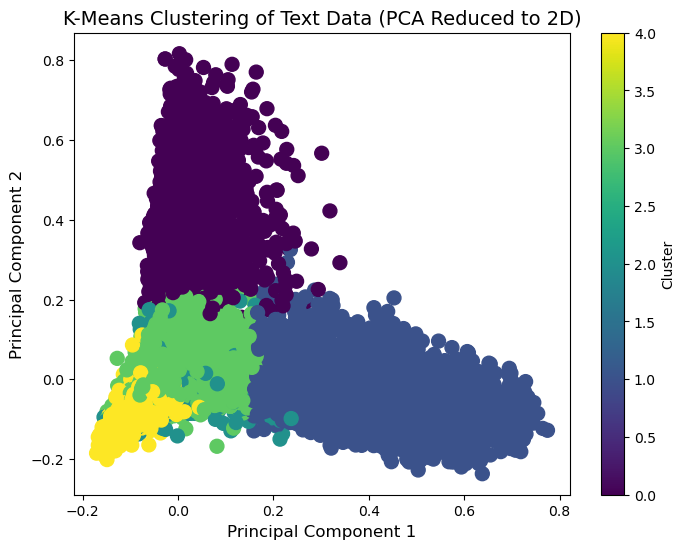

In [57]:
# Step 1: Apply PCA to reduce the dimensionality of the TF-IDF matrix to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfid.toarray())  # Convert sparse matrix to dense before applying PCA

# Step 2: Visualize the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', s=100)

# Step 3: Add titles and labels
plt.title('K-Means Clustering of Text Data (PCA Reduced to 2D)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

# Show the plot
plt.colorbar(label='Cluster')
plt.show()

In [58]:
# DB Scan
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [59]:
nearest_neighbors = NearestNeighbors(n_neighbors=3).fit(X_tfid)
distances, indices = nearest_neighbors.kneighbors(X_tfid)
distances = np.sort(distances[:, -1]) 

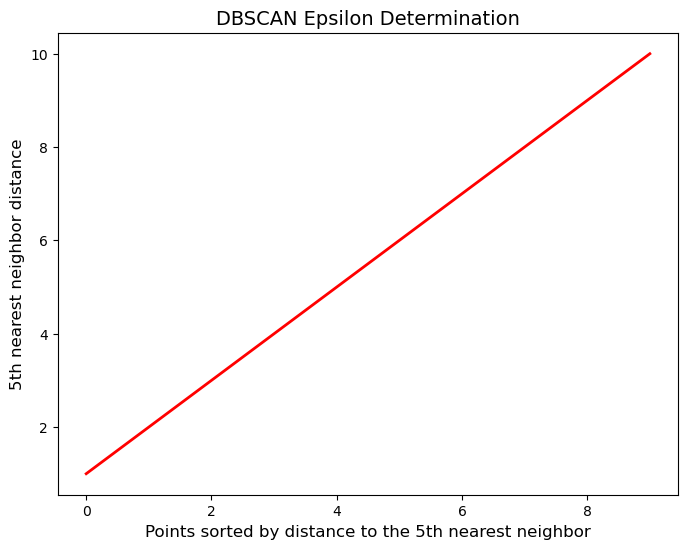

In [60]:
import matplotlib.pyplot as plt

# Example data for 'distances' (replace with actual data)
distances = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Plot with better control
fig, ax = plt.subplots(figsize=(8, 6))  # Optional: to adjust the figure size
ax.plot(distances, color='red', linewidth=2)

# Customize labels and title
ax.set_xlabel("Points sorted by distance to the 5th nearest neighbor", fontsize=12)
ax.set_ylabel("5th nearest neighbor distance", fontsize=12)
ax.set_title("DBSCAN Epsilon Determination", fontsize=14)

# Show the plot
plt.show()


In [61]:
#TF-IDF (Term Frequency-Inverse Document Frequency): Weighs words by importance relative to the entire corpus.
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)  # Limit features to top 5000 words
X = tfidf.fit_transform(df['cleaned_text'])
y = df['label']

In [62]:
#Split the Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [65]:
from sklearn.metrics import classification_report , accuracy_score

#predict the model
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8629899839248176
Classification Report:
               precision    recall  f1-score   support

          CG       0.87      0.85      0.86      4016
          OR       0.85      0.88      0.87      4071

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087



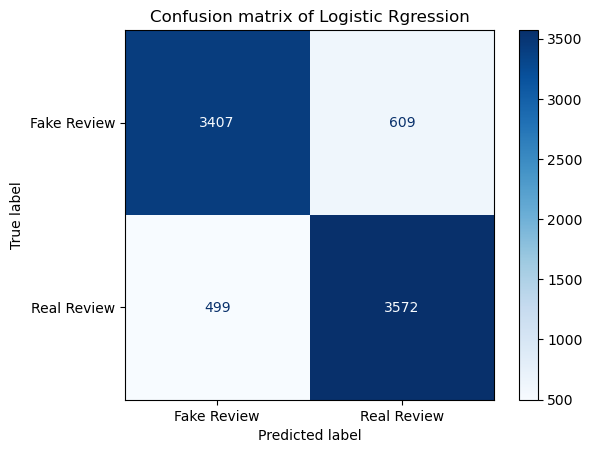

In [66]:
# Confusion matrix
#A confusion matrix is a performance evaluation tool for classification models. It shows the counts of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

#Generate the confusion matrix
cm = confusion_matrix(y_test,y_pred)

#Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm ,display_labels = ['Fake Review' , 'Real Review'])
display.plot(cmap = plt.cm.Blues)
plt.title("Confusion matrix of Logistic Rgression")
plt.show()

In [67]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
rf_y_pred = rf_model.predict(X_test)
# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Classification Report:\n", classification_report(y_test, rf_y_pred))

Accuracy: 0.8485223197724744
Classification Report:
               precision    recall  f1-score   support

          CG       0.83      0.88      0.85      4016
          OR       0.87      0.82      0.85      4071

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087



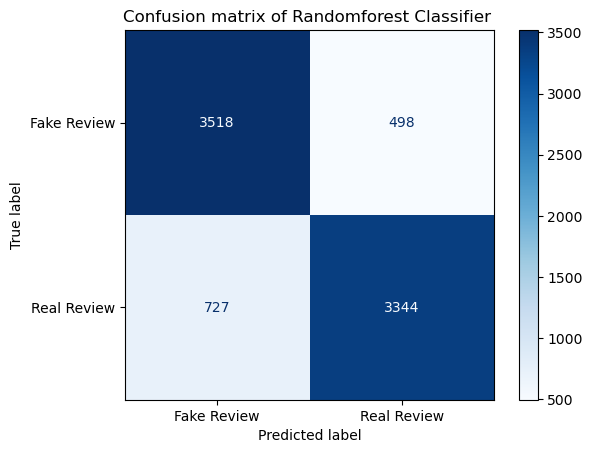

In [69]:
#Confusion matrix
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

#Generate the confusion matrix
cm = confusion_matrix(y_test,rf_y_pred)

#Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm ,display_labels = ['Fake Review' , 'Real Review'])
display.plot(cmap = plt.cm.Blues)
plt.title("Confusion matrix of Randomforest Classifier ")
plt.show()

In [70]:
#SVM
from sklearn.svm import SVC 

#Train SVM model 
svm_model = SVC(kernel = 'linear',C = 1)
svm_model.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [71]:
svm_model_pred = svm_model.predict(X_test)
#Print evaluation metrics
from sklearn.metrics import classification_report , accuracy_score

print("Accuracy:", accuracy_score(y_test,svm_model_pred))
print("Classification Report:\n", classification_report(y_test,svm_model_pred))

Accuracy: 0.8701619883764066
Classification Report:
               precision    recall  f1-score   support

          CG       0.87      0.87      0.87      4016
          OR       0.87      0.87      0.87      4071

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087



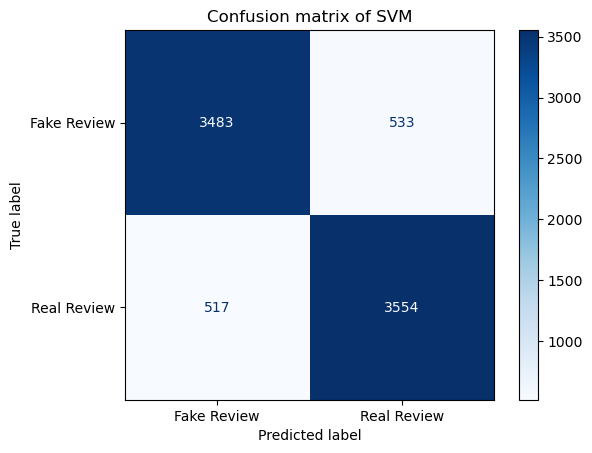

In [72]:
#Confusion matrix for SVM
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

#Generate the confusion matrix
cm = confusion_matrix(y_test,svm_model_pred)

#Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm ,display_labels = ['Fake Review' , 'Real Review'])
display.plot(cmap = plt.cm.Blues)
plt.title("Confusion matrix of SVM")
plt.show()

In [73]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [74]:
y_pred_nb = nb.predict(X_test)
#Print evaluation metrics

print("Accuracy:", accuracy_score(y_test,y_pred_nb))
print("Classification Report:\n", classification_report(y_test,y_pred_nb))

Accuracy: 0.8435761098058613
Classification Report:
               precision    recall  f1-score   support

          CG       0.82      0.87      0.85      4016
          OR       0.87      0.82      0.84      4071

    accuracy                           0.84      8087
   macro avg       0.84      0.84      0.84      8087
weighted avg       0.84      0.84      0.84      8087



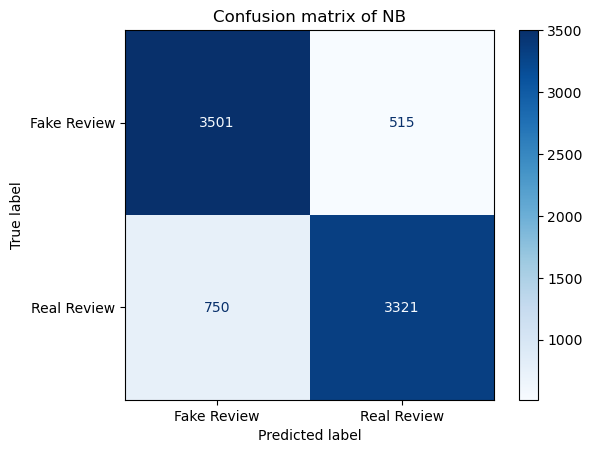

In [75]:
#Confusion matrix
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

#Generate the confusion matrix
cm = confusion_matrix(y_test,y_pred_nb)

#Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm ,display_labels = ['Fake Review' , 'Real Review'])
display.plot(cmap = plt.cm.Blues)
plt.title("Confusion matrix of NB")
plt.show()

In [76]:
# ---  Decision Tree ---
# Train Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

In [77]:
# Print evaluation metrics for Decision Tree
print("\nDecision Tree Model:")
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Classification Report:\n", classification_report(y_test, dt_y_pred))


Decision Tree Model:
Accuracy: 0.7425497712377891
Classification Report:
               precision    recall  f1-score   support

          CG       0.73      0.76      0.74      4016
          OR       0.75      0.73      0.74      4071

    accuracy                           0.74      8087
   macro avg       0.74      0.74      0.74      8087
weighted avg       0.74      0.74      0.74      8087



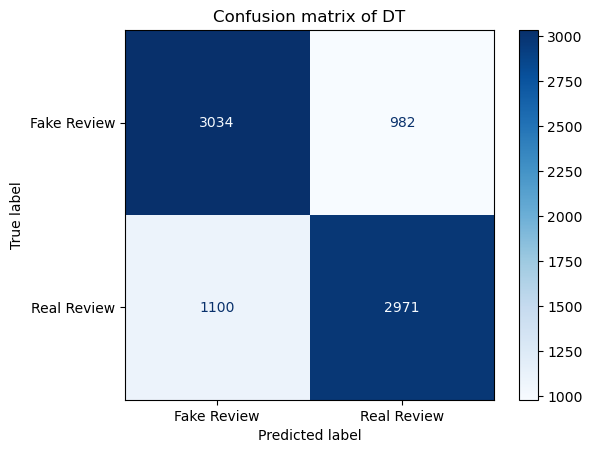

In [78]:
#Confusion matrix
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

#Generate the confusion matrix
cm = confusion_matrix(y_test,dt_y_pred)

#Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm ,display_labels = ['Fake Review' , 'Real Review'])
display.plot(cmap = plt.cm.Blues)
plt.title("Confusion matrix of DT")
plt.show()

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
# K-Nearest Neighbors (KNN) ---
# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)


In [81]:
# Print evaluation metrics for KNN
print("\nK-Nearest Neighbors Model:")
print("Accuracy:", accuracy_score(y_test, knn_y_pred))
print("Classification Report:\n", classification_report(y_test, knn_y_pred))


K-Nearest Neighbors Model:
Accuracy: 0.6538889575862495
Classification Report:
               precision    recall  f1-score   support

          CG       0.60      0.93      0.73      4016
          OR       0.84      0.38      0.53      4071

    accuracy                           0.65      8087
   macro avg       0.72      0.66      0.63      8087
weighted avg       0.72      0.65      0.63      8087



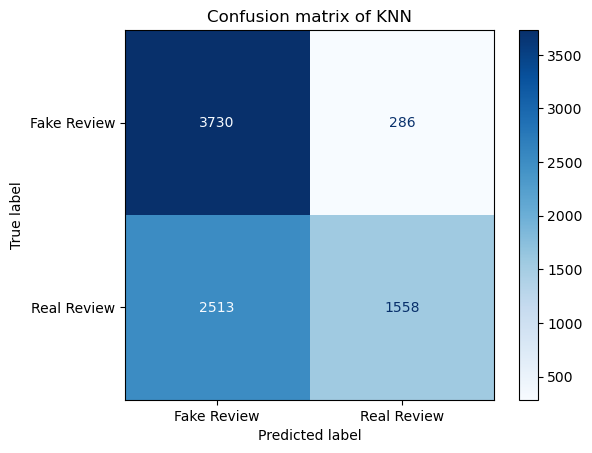

In [82]:
#Confusion matrix
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

#Generate the confusion matrix
cm = confusion_matrix(y_test,knn_y_pred)

#Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm ,display_labels = ['Fake Review' , 'Real Review'])
display.plot(cmap = plt.cm.Blues)
plt.title("Confusion matrix of KNN")
plt.show()

In [83]:
#Comparing model performance
print("Performance of various ML models :")
print('\n')
print("Logistic Regression Prediction Accuracy :" , str(np.round(accuracy_score(y_test,y_pred)*100,2))+'%')
print("Random Forest Prediction Accuracy :" , str(np.round(accuracy_score(y_test,rf_y_pred)*100,2))+'%')
print("SVM Prediction Accuracy :" , str(np.round(accuracy_score(y_test,svm_model_pred)*100,2))+'%')
print("Naive Bayes Prediction Accuracy :" , str(np.round(accuracy_score(y_test,y_pred_nb)*100,2))+'%')
print("Decision Tree Prediction Accuracy:",str(np.round(accuracy_score(y_test,dt_y_pred)*100,2))+'%')
print("K-Nearest Neighbors Accuracy:",str(np.round(accuracy_score(y_test,knn_y_pred)*100,2))+'%')

Performance of various ML models :


Logistic Regression Prediction Accuracy : 86.3%
Random Forest Prediction Accuracy : 84.85%
SVM Prediction Accuracy : 87.02%
Naive Bayes Prediction Accuracy : 84.36%
Decision Tree Prediction Accuracy: 74.25%
K-Nearest Neighbors Accuracy: 65.39%


In [84]:
# The Support vector machine model performs better than any other models with an accuracy rate of 87.0 %